In [1]:
import multiprocessing
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.stats.multitest as multi
import bottleneck as bn

from tqdm import tqdm

import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
from scipy import io

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.4 umap==0.4.4 numpy==1.18.1 scipy==1.4.1 pandas==1.0.0 scikit-learn==0.22.1 statsmodels==0.11.1


In [4]:
%run ./pyrogue/rogue.py

In [5]:
adata = sc.read_h5ad('/Users/papadopoulos/Documents/data/ensomatosis/pd48hpf.h5ad')
results_file = 'write/pd48hpf_leidens.h5ad'

In [6]:
samples = [int(str(s).split("-")[1]) for s in adata.obs.index]
cheat_samples = np.repeat(1, adata.shape[0])
var_genes = np.array(adata.var.index, dtype=str)
counts = adata.raw.X.T

# names, ind_raw, ind_filt = np.intersect1d(adata.raw.var.gene_ids, adata.var.gene_ids, return_indices=True)
expr = pd.DataFrame(data=counts.toarray(), index=adata.raw.var.index, columns=adata.obs.index)

labels = np.array(adata.obs["leiden"], dtype=int)

In [7]:
expr.shape

(97931, 13974)

In [11]:
res = rogue(expr, labels, samples, platform="UMI", pretty_output=True, span=0.5)

Skipping sample 1 for cluster 70
Skipping sample 1 for cluster 72
Skipping sample 1 for cluster 73
Skipping sample 1 for cluster 74
Skipping sample 1 for cluster 75
Skipping sample 1 for cluster 76
Skipping sample 1 for cluster 77
Skipping sample 1 for cluster 78
Skipping sample 2 for cluster 78
Skipping sample 1 for cluster 79
Skipping sample 2 for cluster 79
Skipping sample 1 for cluster 80
Skipping sample 2 for cluster 80


In [34]:
res[22]

1    0.954999
2    0.979763
Name: 22, dtype: object

In [27]:
np.sum(labels == 15)

287

In [37]:
coords = adata.obsm["X_umap"]

In [39]:
import matplotlib.pyplot as plt

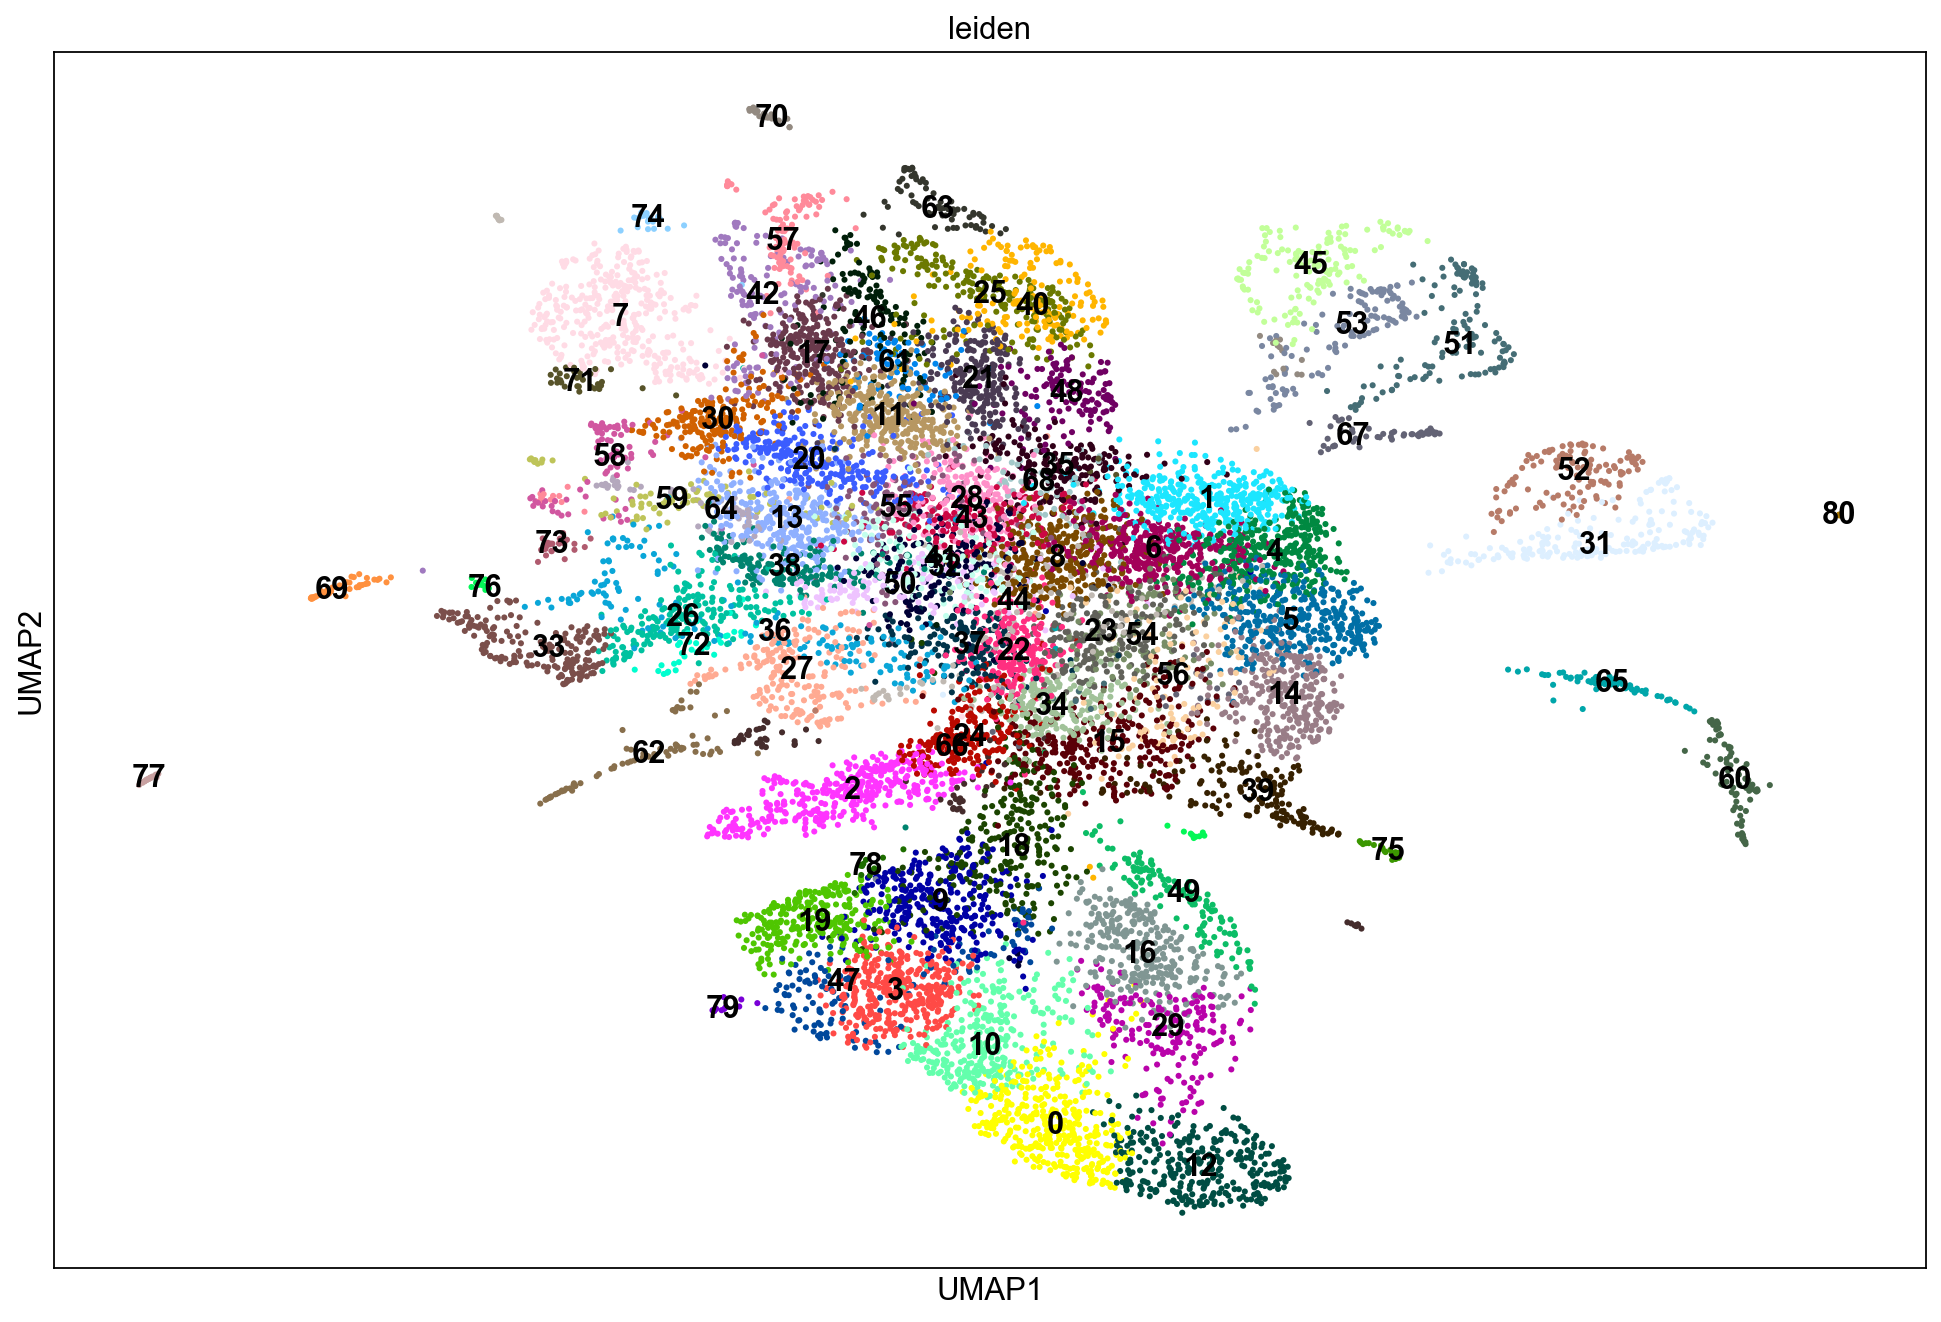

In [72]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sc.pl.umap(adata, color="leiden", ax=ax, s=30, legend_loc='on data')

In [125]:
res[74]

1         NaN
2    0.981577
Name: 74, dtype: object

In [129]:
def roguer_than(scores, cutoff, strict=True):
    if strict:
        high_scores = np.mean(scores) > cutoff
        return np.where(high_scores)[0]
    else:
        high_scores = np.where(scores > cutoff)[1]
        return np.unique(high_scores)

In [146]:
expr.shape

(97931, 13974)

In [163]:
bla = np.zeros(expr.shape[1])
for c in range(81):
    keep = labels == c
    bla[keep] = np.mean(res)[c]
    
adata.obs["rogue"] = bla

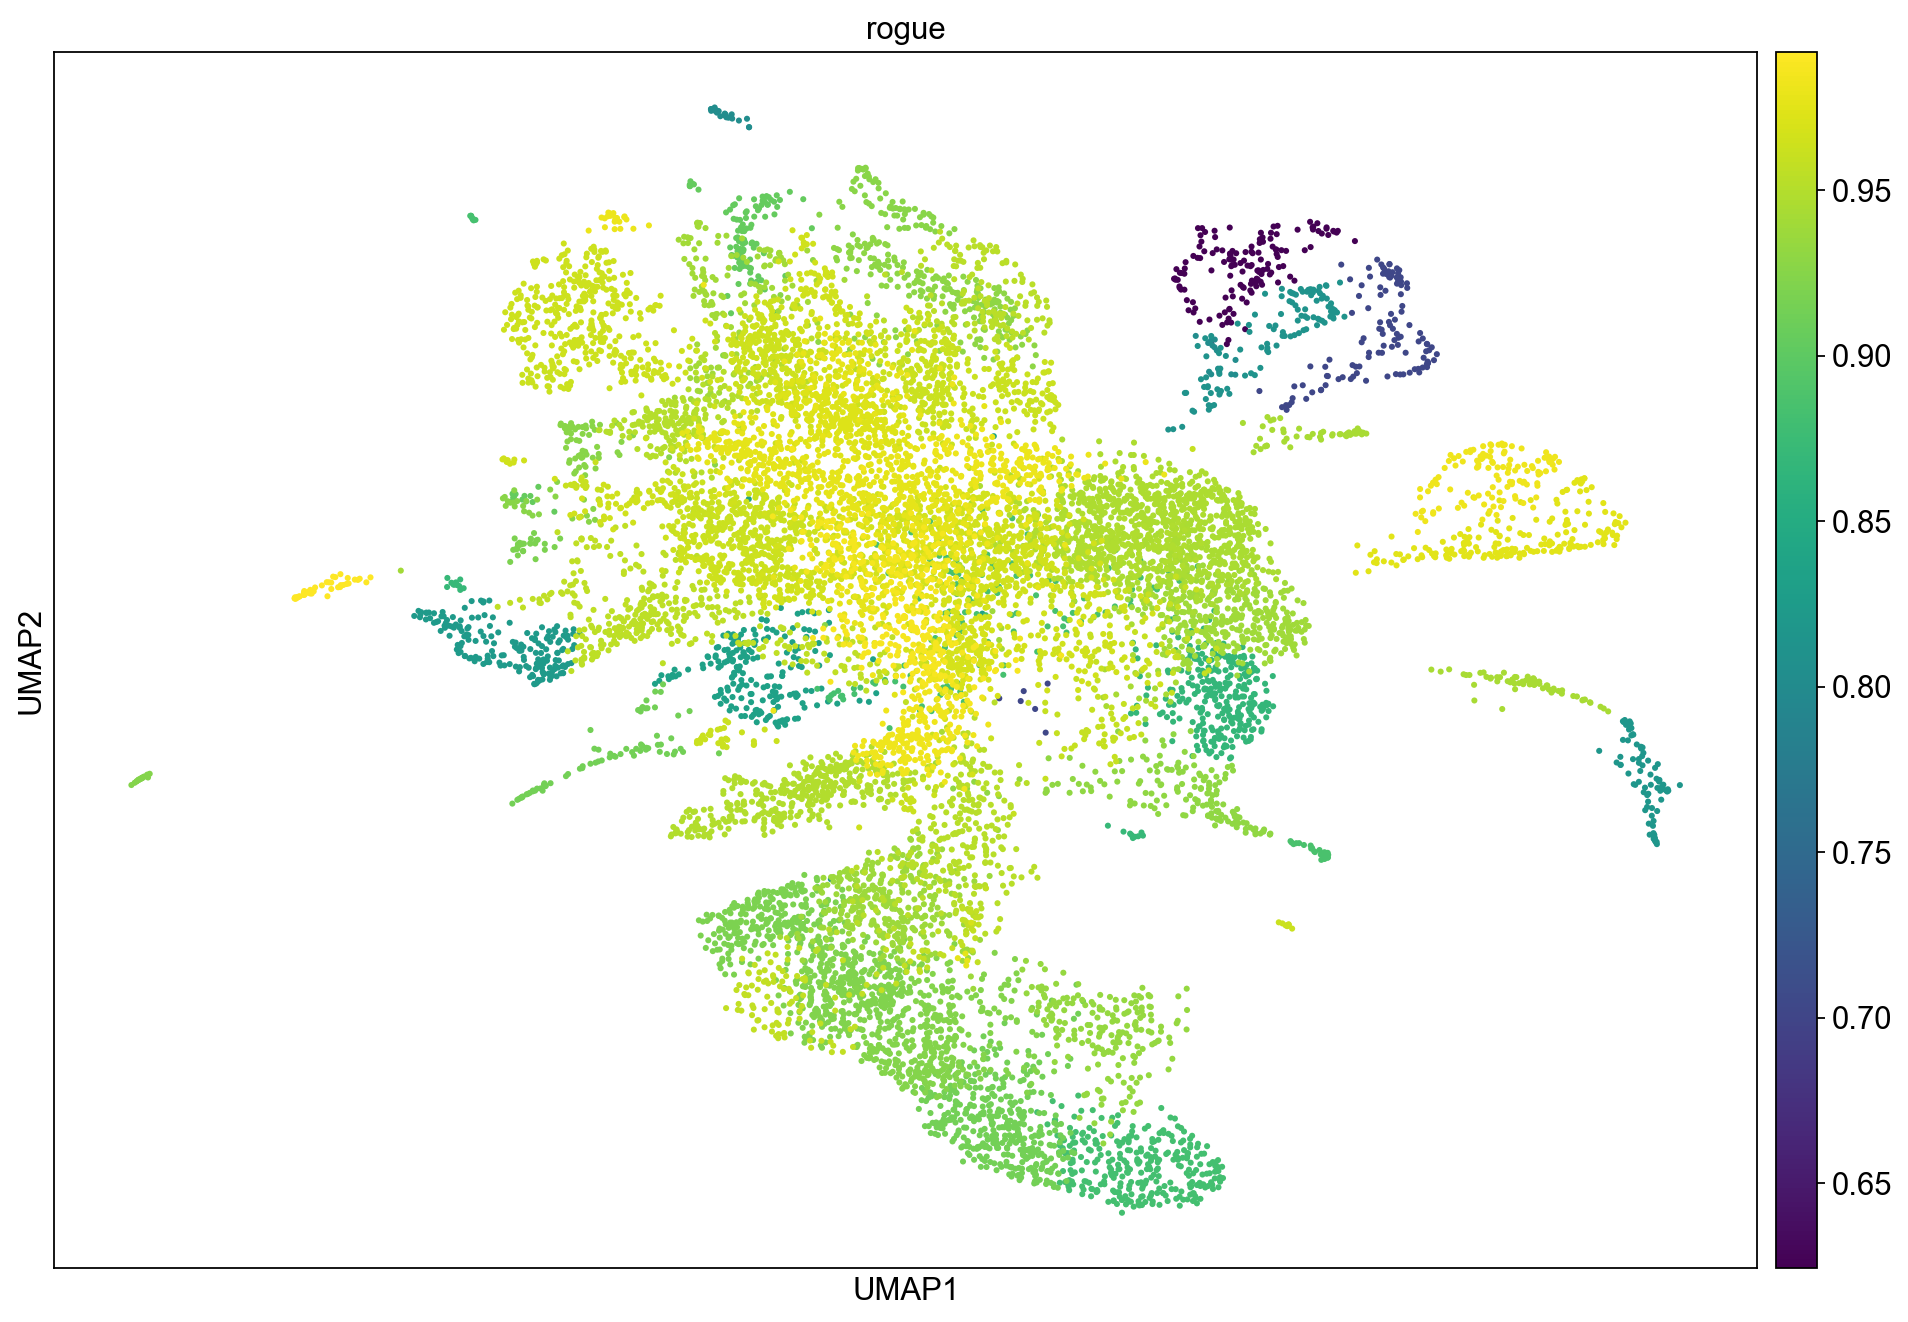

In [164]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sc.pl.umap(adata, color="rogue", ax=ax, s=30)